In [1]:
%%javascript
// Git Commit Button - JavaScript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_NAME = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [2]:
# Git Commit Button
from IPython.display import display, Javascript
import ipywidgets as widgets
import sh

commit_button = widgets.Button(description="Git commit")
display(commit_button)
# display_button = widgets.Button(description="Git commit")
# display(button)

def do_commit(b):
    display(Javascript('IPython.notebook.save_checkpoint();'))
    print(sh.git.add(NOTEBOOK_NAME))
    print(sh.git.status())
    print(sh.git.commit(m="Automatic commit triggered by in-script button"))
    print(sh.git.push("origin","master"))

#     print(git.status())

commit_button.on_click(do_commit)

Button(description='Git commit', style=ButtonStyle())

number of zeros 0
number of rows 56
number of cols 54
number of zeros in col 1 0
number of zeros in col  0  :  0
number of zeros in col  1  :  0
number of zeros in col  2  :  56
number of zeros in col  3  :  0
number of zeros in col  4  :  0
number of zeros in col  5  :  56
number of zeros in col  6  :  0
number of zeros in col  7  :  0
number of zeros in col  8  :  56
number of zeros in col  9  :  9
number of zeros in col  10  :  9
number of zeros in col  11  :  56
number of zeros in col  12  :  27
number of zeros in col  13  :  27
number of zeros in col  14  :  56
number of zeros in col  15  :  0
number of zeros in col  16  :  0
number of zeros in col  17  :  56
number of zeros in col  18  :  0
number of zeros in col  19  :  0
number of zeros in col  20  :  56
number of zeros in col  21  :  0
number of zeros in col  22  :  0
number of zeros in col  23  :  56
number of zeros in col  24  :  0
number of zeros in col  25  :  0
number of zeros in col  26  :  56
number of zeros in col  27 

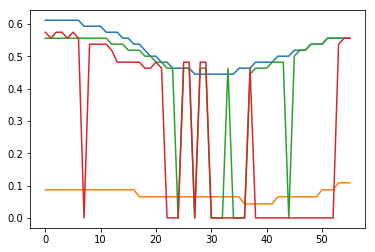

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fileName = "storage/data_2d.csv"
data = np.genfromtxt(fileName, delimiter=",")
print("number of zeros", np.sum(data[:,0]==0))
print("number of rows", len(data[:,0]))
print("number of cols", len(data[0,:]))


print("number of zeros in col 1", np.sum(data[:,1]==0))

for i in range(54): 
    print("number of zeros in col ", i, " : ", np.sum(data[:,i]==0))
    
    
plt.plot(data[:,0])
plt.plot(data[:,1])
plt.plot(data[:,9])
plt.plot(data[:,12])


In [4]:
np.linspace(.47, .6, 5)

array([0.47  , 0.5025, 0.535 , 0.5675, 0.6   ])

In [5]:
for col in range(data.shape[1]):
    if not np.all(data[:,col]==0):
        # extrapolate at the top
        if data[0,col]==0:
            for i, val in enumerate(data[:,col]): 
                if val!=0:
                    gapEnd = i
                    break
            data[0:gapEnd,col] = val

        # extrapolate at the bottom
        if data[-1,col]==0:
            for i, val in reversed(list(enumerate(data[:,col]))): 
                if val!=0:
                    gapStart = i
                    break
            data[gapStart:,col] = val

        # interpolate 
        while np.any(data[:,col]==0):
            for i, val in enumerate(data[:,col]): 
                if val==0:
                    gapStart = i
                    for j, val2 in enumerate(data[gapStart:,col], gapStart): 
                        if val2!=0:
                            gapEnd = j
                            break
                    break
            # create the linspace
            data[gapStart-1:gapEnd+1, col] = np.linspace(data[gapStart-1,col], data[gapEnd,col], gapEnd-gapStart+2)

data[:,col]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [6]:
list(reversed(list(enumerate(data[:,12]))))

[(55, 0.5555555555555556),
 (54, 0.5555555555555556),
 (53, 0.537037037037037),
 (52, 0.5324074074074073),
 (51, 0.5277777777777777),
 (50, 0.5231481481481481),
 (49, 0.5185185185185185),
 (48, 0.5138888888888888),
 (47, 0.5092592592592592),
 (46, 0.5046296296296295),
 (45, 0.49999999999999994),
 (44, 0.4953703703703703),
 (43, 0.4907407407407407),
 (42, 0.48611111111111105),
 (41, 0.4814814814814814),
 (40, 0.4768518518518518),
 (39, 0.47222222222222215),
 (38, 0.46759259259259256),
 (37, 0.4629629629629629),
 (36, 0.46527777777777773),
 (35, 0.46759259259259256),
 (34, 0.4699074074074074),
 (33, 0.4722222222222222),
 (32, 0.474537037037037),
 (31, 0.4768518518518518),
 (30, 0.47916666666666663),
 (29, 0.48148148148148145),
 (28, 0.48148148148148145),
 (27, 0.48148148148148145),
 (26, 0.48148148148148145),
 (25, 0.48148148148148145),
 (24, 0.4768518518518518),
 (23, 0.4722222222222222),
 (22, 0.46759259259259256),
 (21, 0.4629629629629629),
 (20, 0.48148148148148145),
 (19, 0.46296296

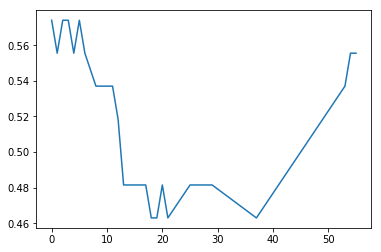

In [7]:
plt.plot(data[:,12])

In [8]:
data[3, 12]

0.5740740740740741

In [9]:
data[:,12]+1

array([1.57407407, 1.55555556, 1.57407407, 1.57407407, 1.55555556,
       1.57407407, 1.55555556, 1.5462963 , 1.53703704, 1.53703704,
       1.53703704, 1.53703704, 1.51851852, 1.48148148, 1.48148148,
       1.48148148, 1.48148148, 1.48148148, 1.46296296, 1.46296296,
       1.48148148, 1.46296296, 1.46759259, 1.47222222, 1.47685185,
       1.48148148, 1.48148148, 1.48148148, 1.48148148, 1.48148148,
       1.47916667, 1.47685185, 1.47453704, 1.47222222, 1.46990741,
       1.46759259, 1.46527778, 1.46296296, 1.46759259, 1.47222222,
       1.47685185, 1.48148148, 1.48611111, 1.49074074, 1.49537037,
       1.5       , 1.50462963, 1.50925926, 1.51388889, 1.51851852,
       1.52314815, 1.52777778, 1.53240741, 1.53703704, 1.55555556,
       1.55555556])

In [10]:
from scipy import signal

for i in range(len(data[0,:])):
    win = signal.hann(10)
    data[:,i] = signal.convolve(data[:,i], win, mode='same') / sum(win)

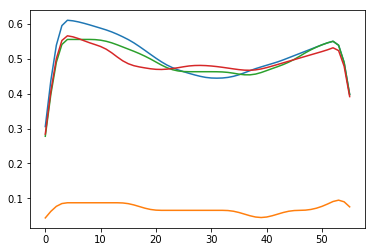

In [11]:
plt.plot(data[:,0])
plt.plot(data[:,1])
plt.plot(data[:,9])
plt.plot(data[:,12])